In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import re
from cycler import cycler

In [2]:
#Annual population estimates from Puerto Rico 
df=pd.read_csv('PEP_2017_PEPANNRES/populationpuertorico.csv',encoding='latin-1')
df.head()

,GEO.id,GEO.id2,GEO.display-label,rescen42010,resbase42010,respop72010,respop72011,respop72012,respop72013,respop72014,respop72015,respop72016,respop72017
0,Id,Id2,Geography,"April 1, 2010 - Census","April 1, 2010 - Estimates Base",Population Estimate (as of July 1) - 2010,Population Estimate (as of July 1) - 2011,Population Estimate (as of July 1) - 2012,Population Estimate (as of July 1) - 2013,Population Estimate (as of July 1) - 2014,Population Estimate (as of July 1) - 2015,Population Estimate (as of July 1) - 2016,Population Estimate (as of July 1) - 2017
1,0500000US72001,72001,"Adjuntas Municipio, Puerto Rico",19483,19483,19472,19297,19116,19019,18798,18560,18276,17971
2,0500000US72003,72003,"Aguada Municipio, Puerto Rico",41959,41959,41913,41532,41107,40707,40135,39539,38853,38118
3,0500000US72005,72005,"Aguadilla Municipio, Puerto Rico",60949,60949,60766,59976,58978,58036,57078,55808,54525,53164
4,0500000US72007,72007,"Aguas Buenas Municipio, Puerto Rico",28659,28659,28652,28333,28052,27782,27350,26913,26382,25850


In [3]:
df['GEO.display-label']=df['GEO.display-label'].str.extract(r'(.*)Municipio')
df=df.rename(columns={'rescen42010':'April 1, 2010 Census','resbase42010': 'April 1, 2010 Estimates Base', 
                                   'respop72010': 'Population Estimate July 1, 2010', 'respop72011': 'Population Estimate July 1, 2011', 
                                   'respop72012':'Population Estimate July 1, 2012','respop72013':'Population Estimate July 1, 2013',
                                   'respop72014':'Population Estimate July 1, 2014','respop72015':'Population Estimate July 1, 2015',
                                   'respop72016':'Population Estimate July 1, 2016','respop72017':'Population Estimate July 1, 2017','GEO.display-label':'Town'})

In [4]:
df= df.drop(df.index[0])

In [5]:
df=df.drop(columns=['GEO.id','GEO.id2'])

In [6]:
df.head()

,Town,"April 1, 2010 Census","April 1, 2010 Estimates Base","Population Estimate July 1, 2010","Population Estimate July 1, 2011","Population Estimate July 1, 2012","Population Estimate July 1, 2013","Population Estimate July 1, 2014","Population Estimate July 1, 2015","Population Estimate July 1, 2016","Population Estimate July 1, 2017"
1,Adjuntas,19483,19483,19472,19297,19116,19019,18798,18560,18276,17971
2,Aguada,41959,41959,41913,41532,41107,40707,40135,39539,38853,38118
3,Aguadilla,60949,60949,60766,59976,58978,58036,57078,55808,54525,53164
4,Aguas Buenas,28659,28659,28652,28333,28052,27782,27350,26913,26382,25850
5,Aibonito,25900,25900,25874,25537,25205,24879,24448,24040,23566,23108


In [7]:
df.shape

(78, 11)

In [8]:
#Cumulative Estimates of Resident Population Change and Rankings
df2=pd.read_csv('PEP_2017_PEPCUMCHG.ST05/populationchange.csv',encoding='latin-1')

In [9]:
df2=df2.drop(columns=['GEO.id','GEO.id2','GEO.display-label','GC.target-geo-id','GC.target-geo-id2','GC.display-label'])

In [10]:
df2=df2.rename(columns={'GC.display-label.1':'Town','resbase42010': 'Population Change April 1, 2010', 
                                   'respop72017': 'Population Change July 1, 2017', 'numdiff20102017': 'Population Change July 1, 2017', 
                                   'percdiff20102017':'Population Change Percent from 2010 to 2017','rank42010':'Change Rankings April 1, 2010',
                                   'rank72017':'Change Rankings July 1, 2017','numrank20102017':'Total Change from 2010 to 2017',
                                   'percrank20102017':'Total Change Percent from 2010 to 2017'})

In [11]:
df2= df2.drop(df.index[0])

In [12]:
df2['Town']=df2['Town'].str.extract(r'(.*)Municipio')

In [13]:
df2.head()

,Town,"Population Change April 1, 2010","Population Change July 1, 2017","Population Change July 1, 2017",Population Change Percent from 2010 to 2017,"Change Rankings April 1, 2010","Change Rankings July 1, 2017",Total Change from 2010 to 2017,Total Change Percent from 2010 to 2017
0,NaN,"Population Estimate - April 1, 2010 Estimates ...","Population Estimate - July 1, 2017","Change, 2010 to 2017 - Number","Change, 2010 to 2017 - Percent [1]","Rankings - Population Estimate - April 1, 2010...","Rankings - Population Estimate - July 1, 2017","Rankings - Change, 2010 to 2017 - Number","Rankings - Change, 2010 to 2017 - Percent"
2,Adjuntas,19483,17971,-1512,-7.8,65,64,19,25
3,Aguada,41959,38118,-3841,-9.2,26,28,52,35
4,Aguadilla,60949,53164,-7785,-12.8,12,12,68,61
5,Aguas Buenas,28659,25850,-2809,-9.8,49,49,38,43


In [14]:
df2.shape

(79, 9)

In [15]:
population = df.merge(df2, left_on='Town', right_on='Town')
population.head()

,Town,"April 1, 2010 Census","April 1, 2010 Estimates Base","Population Estimate July 1, 2010","Population Estimate July 1, 2011","Population Estimate July 1, 2012","Population Estimate July 1, 2013","Population Estimate July 1, 2014","Population Estimate July 1, 2015","Population Estimate July 1, 2016","Population Estimate July 1, 2017","Population Change April 1, 2010","Population Change July 1, 2017","Population Change July 1, 2017",Population Change Percent from 2010 to 2017,"Change Rankings April 1, 2010","Change Rankings July 1, 2017",Total Change from 2010 to 2017,Total Change Percent from 2010 to 2017
0,Adjuntas,19483,19483,19472,19297,19116,19019,18798,18560,18276,17971,19483,17971,-1512,-7.8,65,64,19,25
1,Aguada,41959,41959,41913,41532,41107,40707,40135,39539,38853,38118,41959,38118,-3841,-9.2,26,28,52,35
2,Aguadilla,60949,60949,60766,59976,58978,58036,57078,55808,54525,53164,60949,53164,-7785,-12.8,12,12,68,61
3,Aguas Buenas,28659,28659,28652,28333,28052,27782,27350,26913,26382,25850,28659,25850,-2809,-9.8,49,49,38,43
4,Aibonito,25900,25900,25874,25537,25205,24879,24448,24040,23566,23108,25900,23108,-2792,-10.8,54,54,37,47


In [16]:
population.keys()

Index(['Town', 'April 1, 2010 Census', 'April 1, 2010 Estimates Base',
       'Population Estimate July 1, 2010', 'Population Estimate July 1, 2011',
       'Population Estimate July 1, 2012', 'Population Estimate July 1, 2013',
       'Population Estimate July 1, 2014', 'Population Estimate July 1, 2015',
       'Population Estimate July 1, 2016', 'Population Estimate July 1, 2017',
       'Population Change April 1, 2010', 'Population Change July 1, 2017',
       'Population Change July 1, 2017',
       'Population Change Percent from 2010 to 2017',
       'Change Rankings April 1, 2010', 'Change Rankings July 1, 2017',
       'Total Change from 2010 to 2017',
       'Total Change Percent from 2010 to 2017'],
      dtype='object')

In [17]:
for column in population.columns[1:]:
        try:
            population[column] = population[column].astype(int)
        except:
            population[column] = population[column].astype(float)

In [18]:
population.dtypes

Town                                            object
April 1, 2010 Census                             int32
April 1, 2010 Estimates Base                     int32
Population Estimate July 1, 2010                 int32
Population Estimate July 1, 2011                 int32
Population Estimate July 1, 2012                 int32
Population Estimate July 1, 2013                 int32
Population Estimate July 1, 2014                 int32
Population Estimate July 1, 2015                 int32
Population Estimate July 1, 2016                 int32
Population Estimate July 1, 2017                 int32
Population Change April 1, 2010                  int32
Population Change July 1, 2017                   int32
Population Change July 1, 2017                   int32
Population Change Percent from 2010 to 2017    float64
Change Rankings April 1, 2010                    int32
Change Rankings July 1, 2017                     int32
Total Change from 2010 to 2017                   int32
Total Chan

In [19]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)


In [69]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family': 'sans-serif',
    'font.sans-serif' : 'Tahoma',
    'axes.facecolor' : '#ffffff',
    'axes.axisbelow':False, 
    'axes.grid' : True,
    'grid.color' : '#bec0c2',
    'grid.linestyle' : 'dotted',
    'axes.spines.left'   : False,   
    'axes.spines.bottom' : False,
    'axes.spines.top'    : False,
    'axes.spines.right' : False,
    'axes.prop_cycle': cycler('color', ['mediumseagreen','mediumaquamarine','mediumturquoise','cadetblue','skyblue','teal',
                                        'mediumspringgreen','seagreen']),
    'xtick.bottom'  : False,
    'ytick.left': False,
    'figure.titlesize' : 'large', 
    'figure.titleweight' : 'bold',
    'figure.facecolor' : '#ffffff',
    'text.color' : '#595959',
    'axes.labelcolor' : '#595959',
    'xtick.color' : '#595959',
    'ytick.color' : '#595959',
    'legend.loc' : 'best',
    'legend.fancybox'    : True,
    'legend.frameon'     : True,
    'legend.edgecolor'     : '0.9',
    'legend.markerscale'   : '0.5',
    'lines.marker'      : None,
    'lines.markersize'  : 3,           
})

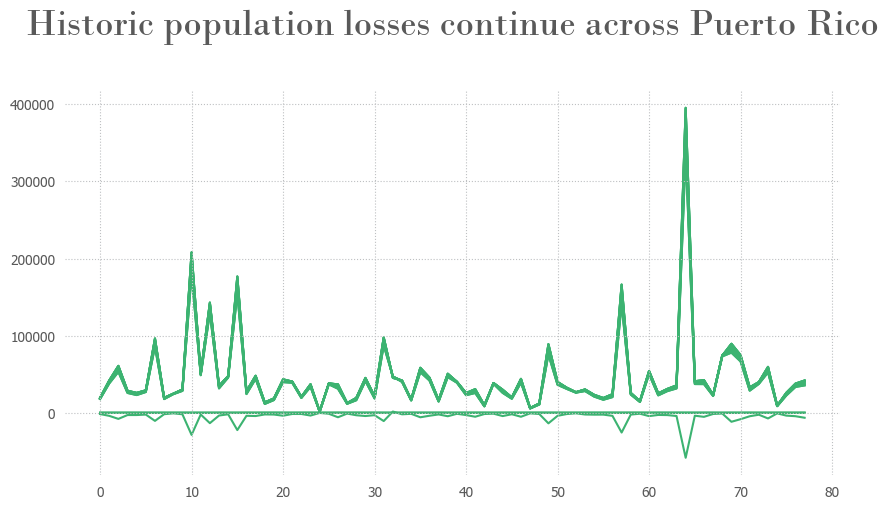

In [73]:
color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]
ax = population.plot(kind='line', figsize=(10, 5), color=color,legend=False)
ax.set_title('Historic population losses continue across Puerto Rico',pad=40)
ax.title.set_fontsize(27)
ax.title.set_fontname('Bodoni MT')
#ax.set_axisbelow('Year')
plt.savefig('testPopulation.pdf')

In [21]:
social= pd.read_excel('ACS_16_5YR_S1901.xls')
social1= social.drop(social.index[0:5])

In [22]:
social1.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
5,NaN,NaN,Households,NaN,NaN,NaN,Families,NaN,Married-couple families,NaN,Nonfamily households,NaN
6,NaN,NaN,Estimate,NaN,NaN,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error
7,Total,NaN,"1,237,180",NaN,NaN,"+/-3,604","867,816","+/-3,686","490,107","+/-3,667","369,364","+/-3,830"
8,"Less than $10,000",NaN,28.8%,NaN,NaN,+/-0.3,23.4%,+/-0.3,12.4%,+/-0.3,44.5%,+/-0.5
9,"$10,000 to $14,999",NaN,11.7%,NaN,NaN,+/-0.2,10.2%,+/-0.2,9.3%,+/-0.3,15.8%,+/-0.4


In [23]:
social1=social1.drop(columns=['Unnamed: 1','Unnamed: 3','Unnamed: 4'])

In [24]:
social1.head()

,Unnamed: 0,Unnamed: 2,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
5,NaN,Households,NaN,Families,NaN,Married-couple families,NaN,Nonfamily households,NaN
6,NaN,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error
7,Total,"1,237,180","+/-3,604","867,816","+/-3,686","490,107","+/-3,667","369,364","+/-3,830"
8,"Less than $10,000",28.8%,+/-0.3,23.4%,+/-0.3,12.4%,+/-0.3,44.5%,+/-0.5
9,"$10,000 to $14,999",11.7%,+/-0.2,10.2%,+/-0.2,9.3%,+/-0.3,15.8%,+/-0.4


In [25]:
social1.to_csv('Income data')
#I move from here to do cleaning in my Text Editor because this is a mess

In [32]:
#INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)  more information in 
#2012-2016 American Community Survey 5-Year Estimates
# https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?src=CF
demo

,Subject,Households Estimate,Margin of Error,Families Estimate,Margin of Error.1,Married-couple families Estimate,Margin of Error.2,Nonfamily households Estimate,Margin of Error.3
0,Total,"1,237,180","+/-3,604","867,816","+/-3,686","490,107","+/-3,667","369,364","+/-3,830"
1,"Less than $10,000",28.8%,+/-0.3,23.4%,+/-0.3,12.4%,+/-0.3,44.5%,+/-0.5
2,"$10,000 to $14,999",11.7%,+/-0.2,10.2%,+/-0.2,9.3%,+/-0.3,15.8%,+/-0.4
3,"$15,000 to $24,999",18.3%,+/-0.2,19.0%,+/-0.3,19.1%,+/-0.4,17.0%,+/-0.4
4,"$25,000 to $34,999",12.2%,+/-0.2,13.8%,+/-0.2,14.9%,+/-0.3,8.2%,+/-0.3
5,"$35,000 to $49,999",11.6%,+/-0.2,13.3%,+/-0.3,15.9%,+/-0.4,6.5%,+/-0.3
6,"$50,000 to $74,999",9.5%,+/-0.2,11.1%,+/-0.2,14.8%,+/-0.3,4.6%,+/-0.2
7,"$75,000 to $99,999",3.7%,+/-0.1,4.4%,+/-0.1,6.1%,+/-0.2,1.6%,+/-0.1
8,"$100,000 to $149,999",2.6%,+/-0.1,3.0%,+/-0.1,4.6%,+/-0.2,1.1%,+/-0.1
9,"$150,000 to $199,999",0.8%,+/-0.1,1.0%,+/-0.1,1.5%,+/-0.1,0.4%,+/-0.1


Data points out that the problem is not just birth depletion, but also unstoppable emigration. The decrease of population extends through several municipalities.

However, there is also data that points out that most people that abandoned the island for hurricane reasons, is already back. 

Let's check out another data. 


In [66]:
movement=pd.read_csv('ts_dom_net_mov_201804.csv')
movement

,Date,Número de pasajeros que salen de PR,Número de pasajeros que llegan a PR,Movimiento neto de pasajeros,Movimiento neto de pasajero últimos 12 meses,Número de pasajeros que salen de SJU,Número de pasajeros que salen de BQN,Número de pasajeros que salen de PSE,Número de pasajeros que salen de MAZ,Número de pasajeros que salen de HUC,...,DDP_9K_D,DDP_B6_D,DDP_AA_D,DDP_VI_D,DDP_OW_D,ADP_9K_D,ADP_B6_D,ADP_AA_D,ADP_VI_D,ADP_OW_D
2018-04,341891,334097,7794,169915,304757,21915,7860,624,1310,0,...,872,891,475,1257,117,875,890,474,1257,0
2018-03,350313,352184,-1871,186611,311447,22080,7975,677,1454,0,...,932,830,465,1104,91,932,833,467,1104,0
2018-02,259969,273179,-13210,193523,233414,13976,6674,596,913,0,...,847,789,438,1048,74,846,790,440,1048,0
2018-01,267706,332429,-64723,201520,241340,14401,7241,553,748,0,...,902,800,476,749,96,897,800,479,749,0
2017-12,327100,310141,16959,281253,298418,18917,8796,578,6,0,...,835,800,370,0,98,837,811,376,0,0
2017-11,244009,198309,45700,229267,228750,10595,3794,520,6,0,...,694,500,259,0,79,692,502,260,0,0
2017-10,243397,148104,95293,181562,230797,9090,2749,477,0,0,...,592,574,256,0,94,591,565,255,0,0
2017-09,175591,133030,42561,93403,158580,11396,3713,190,467,0,...,313,466,168,0,54,317,443,164,0,0
2017-08,408354,382354,26000,66955,358577,27692,8671,519,2452,0,...,823,1067,472,1481,85,823,1064,467,1481,0
2017-07,476267,476217,50,61132,417882,31063,10453,459,3223,0,...,1074,1176,551,1541,86,1068,1174,553,1541,0


In [ ]:
movement['Date'] = pd.to_datetime(playas['Date'], format="%Y-%m-%d")